In [3]:
import ryFin as rf

In [6]:
X= rf.getTicker('^GSPC')
X

Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-09      17.500000
                 ...     
2021-12-28    4792.225098
2021-12-29    4790.960083
2021-12-30    4789.305054
2021-12-31    4773.492554
2022-01-03    4782.377563
Name: ^GSPC, Length: 19759, dtype: float64

In [7]:
X[0]

17.65999984741211

In [8]:
X[-1]/X[0]

270.80280887869714

In [11]:
# (1+r)**94 = 270, n= ?
# log()
# 94 log(1+r) = log(270)
# log(1+r) = log(270) * 1/94
# 1+r = exp(log(270) * 1/94)
# r =  exp(log(270) * 1/94) -1
import numpy as np
r= np.exp(np.log(270)/94)-1
r

0.06136697930167245

In [13]:
#驗算：
(1+r)**94

269.9999999999988

In [17]:
(1+.0614)**94

270.79075278678914

<AxesSubplot:xlabel='Date'>

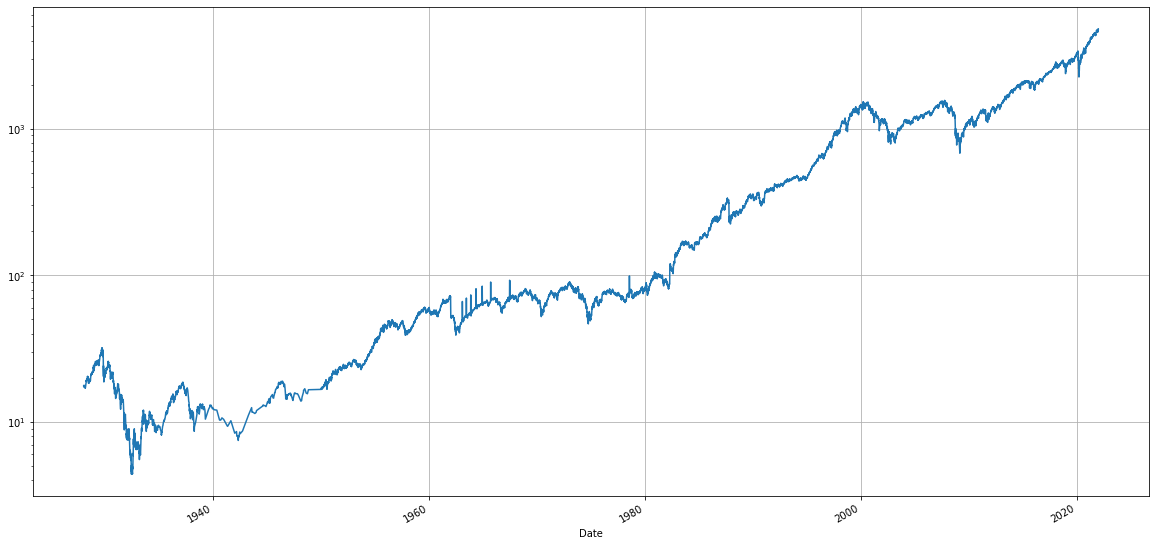

In [20]:
X.plot(grid=True, logy=True, figsize=(20,10))

# Ex001：買股票 @ t，賣股票 @ t + 10 年

- 在 t 時間， 以 X[t] 之價格，
    - 	買入股票，付 1 元，得 n(t) 股 = 1/X[t]
- 在 t+10年 之時間，以 X[t+10年 ] 之價格，
    - 	賣出股票，付 n(t) 股，得 y(t)元 = X[t+10年 ] *n(t)
 
- 從 1928.01.01 開始，持續做 ( daily, weekly, monthly, yearly) ~ 2012.01.01 (距今10年前)

- 總共付出多少元？
- 有多少天賺錢？賺多少？(平均，標準差)
- 有多少天賠錢？賠多少？(平均，標準差)
- 總共賺賠多少？(平均，標準差)

In [33]:
import pandas as pd

τ= 10*250 # 每年約 250 交易日
X0= X.shift(0)
Xτ= X.shift(-τ)  # 把 X 之曲線往【前】(左) 移 τ 天

Y= pd.DataFrame([X0, Xτ]).transpose()
Y.columns= ['X0', 'Xτ']
Y

,X0,Xτ
Date,,
1927-12-30,17.660000,24.459999
1928-01-03,17.760000,24.540001
1928-01-04,17.719999,24.150000
1928-01-05,17.549999,24.219999
1928-01-09,17.500000,24.180000
...,...,...
2021-12-28,4792.225098,NaN
2021-12-29,4790.960083,NaN
2021-12-30,4789.305054,NaN


In [58]:
#1. 總共付出多少元？
# 
Z= Y.dropna() # 清除 NaN

# 檢查以下資料，判斷何者為所需之答案，須參考原始資料！

Z.iloc[0], Z.iloc[-1],Z.count(), Z.shape, Z.size,
Z.index,  Z.index.size,
Z.index[0], Z.index[-1], Z.index.size

dayBegin= Z.index[0]
dayEnd=   Z.index[-1]
days=     Z.index.size
cost= 1 * days

ans= f'''
dayBegin={dayBegin}
dayEnd=  {dayEnd}  
days=    {days} 交易日
cost=    {cost} 元'''
print(ans)


dayBegin=1927-12-30 00:00:00
dayEnd=  2012-01-27 00:00:00  
days=    17259 交易日
cost=    17259 元


In [59]:
#2. 有多少天賺錢？賺多少？(平均，標準差)
# 
Z

,X0,Xτ
Date,,
1927-12-30,17.660000,24.459999
1928-01-03,17.760000,24.540001
1928-01-04,17.719999,24.150000
1928-01-05,17.549999,24.219999
1928-01-09,17.500000,24.180000
...,...,...
2012-01-23,1315.865021,4792.225098
2012-01-24,1313.157501,4790.960083
2012-01-25,1319.102539,4789.305054


In [63]:
gain= Z['Xτ']/Z['X0']
gain

Date
1927-12-30    1.385051
1928-01-03    1.381757
1928-01-04    1.362867
1928-01-05    1.380057
1928-01-09    1.381714
                ...   
2012-01-23    3.641882
2012-01-24    3.648428
2012-01-25    3.630730
2012-01-26    3.608232
2012-01-27    3.632397
Length: 17259, dtype: float64

In [64]:
gain>=1

Date
1927-12-30    True
1928-01-03    True
1928-01-04    True
1928-01-05    True
1928-01-09    True
              ... 
2012-01-23    True
2012-01-24    True
2012-01-25    True
2012-01-26    True
2012-01-27    True
Length: 17259, dtype: bool

In [66]:
(gain>=1).sum()

16018

In [69]:
gain[gain>1].count()

16015

In [70]:
gain[gain>1].sum()

39151.858092628114

In [72]:
gain[gain<=1].count()

1244

In [73]:
gain[gain<=1].sum()

1065.5703866962826

In [93]:
#2. 有多少天賺錢？賺多少？(平均，標準差)
# 
gain= Z['Xτ']/Z['X0']
earnOrNot= (gain>1) # True/False
earnDays=  gain[earnOrNot].count()
earnMoney= gain[earnOrNot].sum()  # need minus cost
cost= earnDays *1
earnMoney -= cost

ans= f'''
earnDays=  {earnDays} 天
cost=      {cost} 元
earnMoney= {earnMoney:.0f} 元
'''
print(ans)


earnDays=  16015 天
cost=      16015 元
earnMoney= 23137 元



In [88]:
gain[earnOrNot].mean(), gain[earnOrNot].std()

(2.4446992252655693, 1.1749664821652321)

In [89]:
 gain[earnOrNot].describe()

count    16015.000000
mean         2.444699
std          1.174966
min          1.000068
25%          1.529332
50%          2.173444
75%          3.076145
max         10.897727
dtype: float64

In [94]:
averageCost= 1
averageEarn=  gain[earnOrNot].mean() # need minus cost
averageEarn -= averageCost
stdEarn= gain[earnOrNot].std()

ans= f'''
averageEarn= {averageEarn:.2f} 元/天
stdEarn=     {stdEarn:.2f} 元/天
'''
print(ans)


averageEarn= 1.44 元/天
stdEarn=     1.17 元/天



In [97]:
#3. 有多少天賠錢？賠多少？(平均，標準差)
# 

#gain= Z['Xτ']/Z['X0']
lossOrNot= (gain<=1) # True/False
lossDays=  gain[lossOrNot].count()
incomeMoney= gain[lossOrNot].sum()  # need minus cost
cost= lossDays *1
earnMoney= incomeMoney - cost

ans= f'''
lossDays=  {lossDays} 天
cost=      {cost} 元
earnMoney= {earnMoney:.0f} 元
'''
print(ans)


lossDays=  1244 天
cost=      1244 元
earnMoney= -178 元



In [98]:
gain[lossOrNot].describe()

count    1244.000000
mean        0.856568
std         0.116250
min         0.522459
25%         0.765761
50%         0.866299
75%         0.966849
max         1.000000
dtype: float64

In [99]:
averageLoss=  gain[lossOrNot].mean() # need minus cost
averageCost= 1
averageLoss -= averageCost
stdLoss= gain[lossOrNot].std()

ans= f'''
averageLoss= {averageLoss:.2f} 元/天
stdLoss=     {stdLoss:.2f} 元/天
'''
print(ans)


averageLoss= -0.14 元/天
stdLoss=     0.12 元/天



In [ ]:
#4. 總共賺賠多少？(平均，標準差)

<AxesSubplot:title={'center':'invest 1 dallars each day, earn money after 10 years'}, xlabel='Date'>

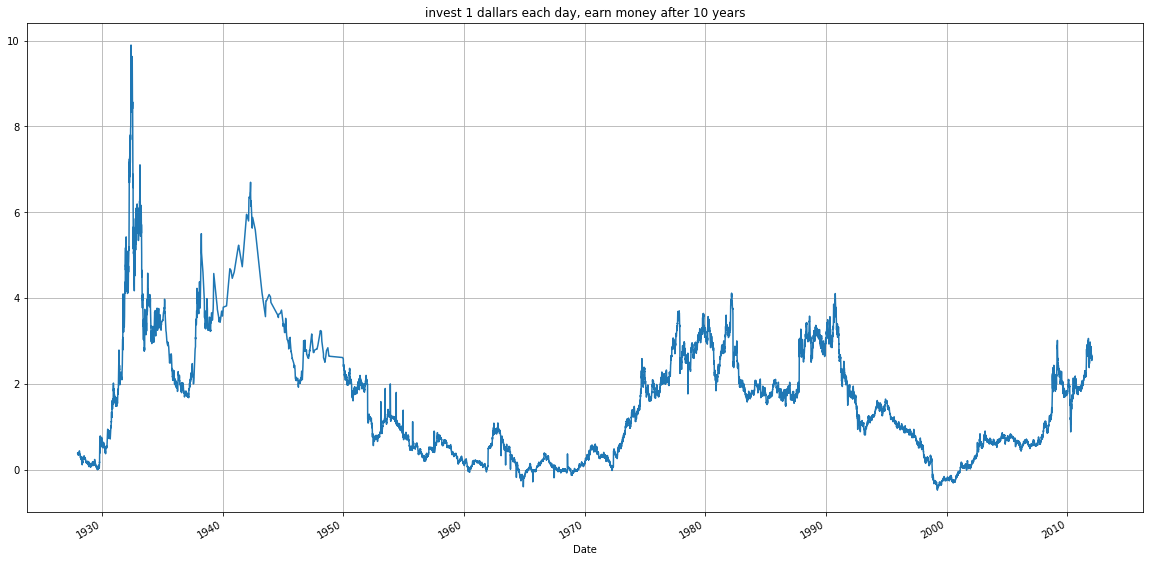

In [108]:
gain= Z['Xτ']/Z['X0']
cost= 1 # 元/天
earn= gain-cost
earn.plot(grid=True,figsize=(20,10), title='invest 1 dallars each day, earn money after 10 years')

count    17259.000000
mean         1.330229
std          1.204453
min         -0.477541
25%          0.372268
50%          1.024967
75%          2.025110
max          9.897727
dtype: float64

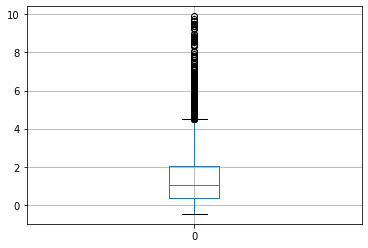

In [117]:
pd.DataFrame(earn).boxplot()
earn.describe()

In [124]:
總投入成本= earn.count() *1
總共淨賺賠= earn.sum()
總報酬率= 總共淨賺賠/總投入成本

In [126]:
ans= f'''
總投入成本= {總投入成本} 元
總共淨賺賠= {總共淨賺賠:.0f} 元
總報酬率=   +{總報酬率*100:.2f}% 
'''
print(ans)


總投入成本= 17259 元
總共淨賺賠= 22958 元
總報酬率=   +133.02% 



<AxesSubplot:>

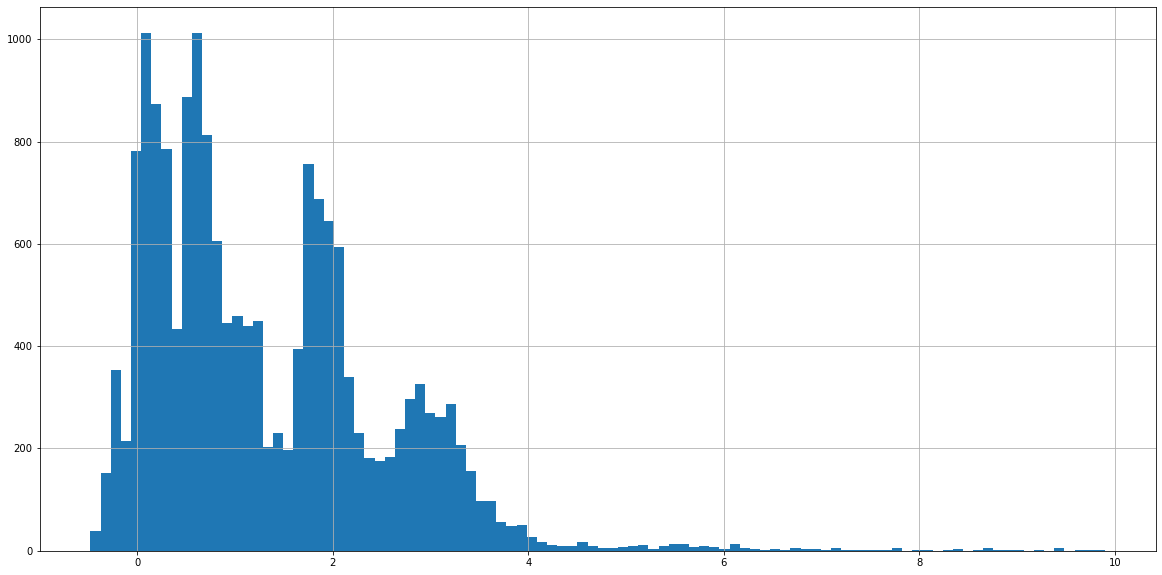

In [128]:
# 再多看一下統計資訊， histogram
# 堅定信心！

earn.hist(figsize=(20,10), bins=100)

<AxesSubplot:>

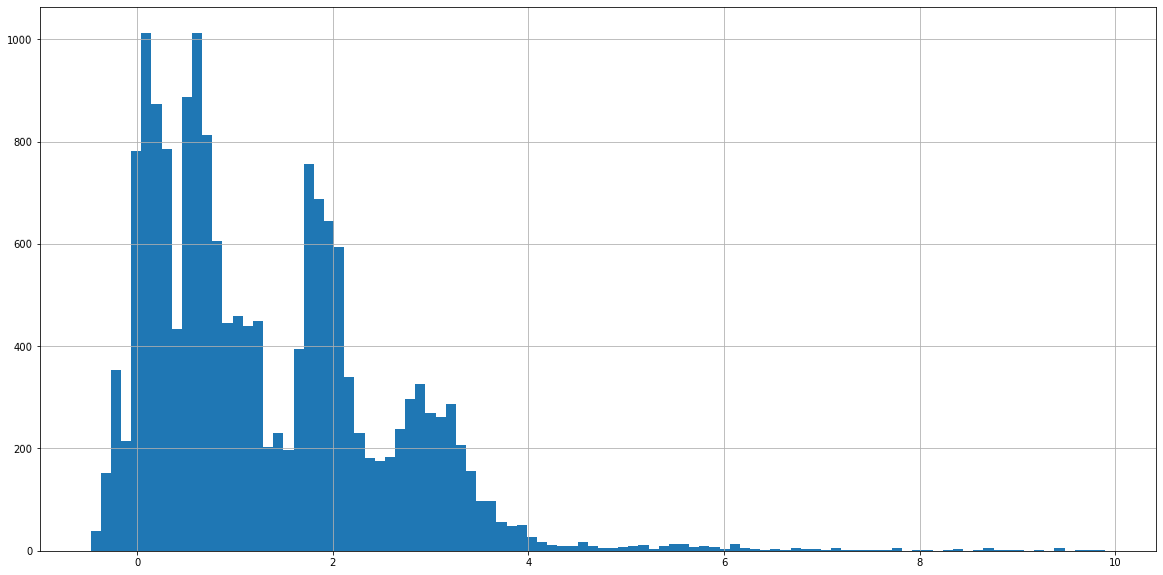

In [129]:
earn.hist(figsize=(20,10), bins=100)